## Problem 1

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

In [13]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [14]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

## Problem 2

### Question 1

In [14]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [15]:
np.random.seed(9)

n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

k = 5

coef = 10 * np.ones(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[k:]] = 0 
y = np.dot(X, coef)

y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]

In [16]:
lr = LinearRegression()

def Forward_selection(X, y, nfeatures):
    featurelist = []
    rscorelist = []
    errorlist = []
    allfeatures = X.shape[1]
    for nf in range(nfeatures):
        feature_score = np.zeros(allfeatures)
        for feature in range(allfeatures):
            if feature not in featurelist:
                lr.fit(X[:, featurelist+[feature]], y)
                feature_score[feature] = r2_score(y, lr.predict(X[:, featurelist+[feature]]))
        featurelist.append(np.where(feature_score == np.amax(feature_score))[0][0])
        rscorelist.append(np.amax(feature_score))
        errorlist.append(mean_squared_error(y, lr.predict(X[:, featurelist])))
    return featurelist, rscorelist,errorlist

In [17]:
print("Five features added by forward selection are (in order): \n", Forward_selection(X, y, 5)[0])
print("Th R score after each feature have been added by forward selection are (in order): \n", Forward_selection(X, y, 5)[1])

Five features added by forward selection are (in order): 
 [123, 81, 173, 71, 74]
Th R score after each feature have been added by forward selection are (in order): 
 [0.32311785200745846, 0.5608678445291666, 0.7094707853097266, 0.8595004247180991, 1.0]


In [18]:
turelist=[]
for i in range(200):
    if coef[i] !=0:
        turelist.append(i)
print('The ture feature list is ',turelist)

The ture feature list is  [71, 74, 81, 123, 173]


### Question 2

In [19]:
# get the test error which is mean square error
error = Forward_selection(X,y,200)[2]

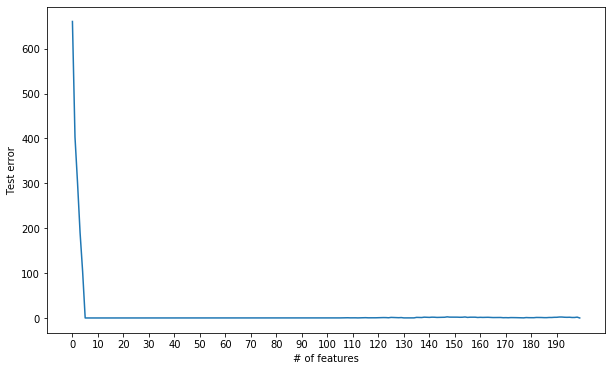

In [20]:
fig = plt.figure(figsize=(10,6))
plt.plot(range(200),error)
plt.xticks(np.arange(0, 200, step=10))
plt.xlabel('# of features')
plt.ylabel('Test error')
plt.show()

### Question 3

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [22]:
# Set the parameters by cross-validation
parameters = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.5,1,5,10,25,50,100]}

scores = ['precision', 'recall']

lasso = Lasso()

for score in scores:
    print("\n# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(lasso, parameters, cv=5,
                       scoring='r2')
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'alpha': 0.01}

Grid scores on development set:

-0.584 (+/-1.382) for {'alpha': 0.0001}
0.125 (+/-0.712) for {'alpha': 0.001}
1.000 (+/-0.000) for {'alpha': 0.01}
1.000 (+/-0.000) for {'alpha': 0.05}
1.000 (+/-0.000) for {'alpha': 0.1}
0.998 (+/-0.001) for {'alpha': 0.5}
0.991 (+/-0.005) for {'alpha': 1}
0.778 (+/-0.124) for {'alpha': 5}
0.216 (+/-0.347) for {'alpha': 10}
-0.137 (+/-0.380) for {'alpha': 25}
-0.137 (+/-0.380) for {'alpha': 50}
-0.137 (+/-0.380) for {'alpha': 100}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'alpha': 0.01}

Grid scores on development set:

-0.584 (+/-1.382) for {'alpha': 0.0001}
0.125 (+/-0.712) for {'alpha': 0.001}
1.000 (+/-0.000) for {'alpha': 0.01}
1.000 (+/-0.000) for {'alpha': 0.05}
1.000 (+/-0.000) for {'alpha': 0.1}
0.998 (+/-0.001) for {'alpha': 0.5}
0.991 (+/-0.005) for {'alpha': 1}
0.778 (+/-0.124) for {'alpha': 

### Question 4

In [23]:
parameters = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.5,1,5,10,25,50,100]}

scores = ['precision', 'recall']

lasso = Lasso()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    # change the value of cv from 2 to 20
    for cv_value in range(2,20):
        clf = GridSearchCV(lasso, parameters, cv=cv_value,
                           scoring='r2')
        clf.fit(X_train, y_train)
        print(clf.best_params_)

# Tuning hyper-parameters for precision

{'alpha': 0.05}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
# Tuning hyper-parameters for recall

{'alpha': 0.05}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}
{'alpha': 0.01}


### We found no matter how we change the number of folds, the optimal alpha value is always 0.01. Since Lasso is L1 level regularization so it adds a lot penalty to noise or features which are not important. As long as we hold the dataset constant, no matter how we split the data or how many folds we have, the optimal alpha should be pretty close to a certain value.

### Question 5

In [24]:
from sklearn.linear_model import LassoCV

In [30]:
result = []
for alpha in [0.0001,0.001,0.01,0.05,0.1,0.5,1,5,10,25,50,100]:
    lassocv = LassoCV(alphas=[alpha], random_state=0, cv=5).fit(X_train, y_train)
    result.append(lassocv.score(X_test,y_test))

print('The best alpha value is '+ str([0.0001,0.001,0.01,0.05,0.1,0.5,1,5,10,25,50,100][np.argmax(result)]))

The best alpha value is 0.01


### I think LassoCV would agree with what I did in previous step since it does essentially the same thing. It cuts the whole dataset into several folds and run models with different combination of hyperparamters on each fold, evaluate the performance of each combination of hyperparameters, get the optimal hyperparameter which has the overall best performance across all the folds and use the best hyperparameter to predict the unknown data. 

## Problem 3

### From the article of ‘A Mathematical Theory of Communication’, I have understood that the components within the transition of information, in this case it would be in the form of letters and words. The components include the source, transmitter, receiver and noise. It is interesting how a language can be view in a form of a sequential letters, such that we can analyze the complexity of each words with associated probability. It is surprising to see how the series of approximation can put letters together to form correct words. This led me to think by introducing some rules around the model, for example identify whether a word is an adjective, verb or noun. Another set of series of approximation can be formulate and put the words into correct structures.

### I also have a deeper understanding of entropy and how to interpret entropy in different cases. I learned that the entropy of the joint event is greater than or equal to the sum of the entropy of individual events. If we perform any 'averaging' operation on the probability of each events, the entropy will increase.  I got to know how H (x,y) = H (x) + Hx(y) is derived and what it means. This is the first time I heard the speed od entropy or entropy per second. It measures the amount of information generated by the source per symbol or per second. Relative entropy is the maximum compression possible when we encode into the same alphabet and one minus relative entropy is called redundancy which doesn't contain any useful information when we transmit it. In English, the language we use everyday, James Joyce claimed that about 850 english words have been used frequently which means there is a very high redundancy. 
### Then, this article connects encoding and decoding with entropy. The article says by proper assignment of the transition probabilities the entropy of symbols on a channel can be maximized at the channel capacity. Then, everything about the noiseless channel, I don't really understand the concept and can't connect it to my life.
### Finally, this article touches on the optimal coding schema in terms of transmitting efficiency. Basiclly, the optimal coding schema uses the least amount of code to transmit the entire information. 

## Problem 4

In [39]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
from tika import parser
from collections import Counter
from string import punctuation
import numpy as np

url = 'http://proceedings.mlr.press/v97/'
response = requests.get(url)

In [40]:
soup = BeautifulSoup(response.text, "html.parser")

In [45]:
pdf = []
for link in soup.findAll('a'):
    currentlink = link.get('href')
    if currentlink.endswith('pdf'):
        pdf.append(currentlink)

In [43]:
from urllib.request import urlretrieve

def download_file(download_url):
    urlretrieve(download_url,'pdf123.pdf')

if __name__ == 'main':
    download_file('http://proceedings.mlr.press/v97/abbati19a/abbati19a.pdf')

In [ ]:
import wget

for url in pdf:
    wget.download(url,'C:/Users/Green/Downloads/Business Data Science/HW4/PDF/'+str(find_between_r(url, 'http://proceedings.mlr.press/v97/','.pdf').split('/')[1])+'.pdf')

In [46]:
for url in pdf:
    print(url)

http://proceedings.mlr.press/v97/abbati19a/abbati19a.pdf
http://proceedings.mlr.press/v97/abbati19a/abbati19a-supp.pdf
http://proceedings.mlr.press/v97/abels19a/abels19a.pdf
http://proceedings.mlr.press/v97/abels19a/abels19a-supp.pdf
http://proceedings.mlr.press/v97/abu-el-haija19a/abu-el-haija19a.pdf
http://proceedings.mlr.press/v97/abu-el-haija19a/abu-el-haija19a-supp.pdf
http://proceedings.mlr.press/v97/acharya19a/acharya19a.pdf
http://proceedings.mlr.press/v97/acharya19a/acharya19a-supp.pdf
http://proceedings.mlr.press/v97/acharya19b/acharya19b.pdf
http://proceedings.mlr.press/v97/acharya19b/acharya19b-supp.pdf
http://proceedings.mlr.press/v97/acharya19c/acharya19c.pdf
http://proceedings.mlr.press/v97/adams19a/adams19a.pdf
http://proceedings.mlr.press/v97/adams19a/adams19a-supp.pdf
http://proceedings.mlr.press/v97/adel19a/adel19a.pdf
http://proceedings.mlr.press/v97/adel19a/adel19a-supp.pdf
http://proceedings.mlr.press/v97/adiga19a/adiga19a.pdf
http://proceedings.mlr.press/v97/agar

In [47]:
def find_between_r( s, first, last ):
    try:
        start = s.rindex(first) + len(first)
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [48]:
pdfname = []
for url in pdf:
    print(find_between_r(url, 'http://proceedings.mlr.press/v97/','.pdf').split('/')[1])
    pdfname.append(find_between_r(url, 'http://proceedings.mlr.press/v97/','.pdf').split('/')[1])

abbati19a
abbati19a-supp
abels19a
abels19a-supp
abu-el-haija19a
abu-el-haija19a-supp
acharya19a
acharya19a-supp
acharya19b
acharya19b-supp
acharya19c
adams19a
adams19a-supp
adel19a
adel19a-supp
adiga19a
agarwal19a
agarwal19b
agarwal19b-supp
agarwal19c
agarwal19c-supp
agarwal19d
agarwal19d-supp
agarwal19e
agarwal19e-supp
agrawal19a
agrawal19a-supp
ahmed19a
ahmed19a-supp
aivodji19a
aivodji19a-supp
akimoto19a
akimoto19a-supp
akrour19a
akrour19a-supp
alaa19a
albuquerque19a
albuquerque19a-supp
alet19a
alet19a-supp
allen19a
allen19a-supp
allen19b
allen19b-supp
allen-zhu19a
alvi19a
alvi19a-supp
amin19a
amin19a-supp
ancona19a
ancona19a-supp
anderton19a
anderton19a-supp
anil19a
anil19a-supp
antelmi19a
antelmi19a-supp
arazo19a
arazo19a-supp
arora19a
arora19a-supp
assadi19a
assran19a
assran19a-supp
astudillo19a
astudillo19a-supp
atasu19a
atasu19a-supp
awan19a
awan19a-supp
aydore19a
aydore19a-supp
ayed19a
ayed19a-supp
backurs19a
backurs19a-supp
balaji19a
balaji19a-supp
balcan19a
balcan19a-supp
bal

In [ ]:
def remove_punctuation(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def create_new_dict(name):
    raw1 = parser.from_file(name)
    txtlist1=[]
    if raw1['content'] != None:  
        for word in raw1['content'].split(" "):
            txtlist1.append(remove_punctuation(word.replace('\n','')))

    txtlist1 = [x for x in txtlist1 if x!= '']
    return Counter(txtlist1)

def sumdict(dict1,dict2):
    output = {}
    for x in dict1:
        output[x] = dict1[x]
    for x in dict2:
        if x not in output.keys():
            output[x] = dict2[x]
        else:
            output[x] = output[x]+dict2[x]
    return output

total = {}
for pdf_name in pdfname[0:20]:
    new_count = {k: v for k, v in dict(create_new_dict(pdf_name+'.pdf')).items() if  v > 10}
    total = sumdict(total,new_count)

In [ ]:
sorted_total = sorted(total.items(), key=lambda kv: kv[1], reverse= True)
sorted_total

In [ ]:
def getentropy(total):
    prolist = list(total)
    totalcount = 0
    for x in prolist:
        totalcount+=x[1]
    newlist = []
    for x in prolist:
        newlist.append((x[0], x[1]/totalcount))
    entropy = 0
    for x in newlist:
        entropy += -(x[1] * np.log2(x[1]))
    return entropy

getentropy(sorted_total)

In [ ]:
prolist = list(sorted_total)
totalcount = 0
for x in prolist:
    totalcount+=x[1]
newlist = []
cdf = 0
for x in prolist:
    cdf += (x[1]/totalcount)
    newlist.append([x[0], cdf])
newlist

In [ ]:
def word():
    generator = np.random.uniform(low = 0, high =newlist[-1][1] )
    for x in newlist:
        if generator <= x[1]:
            word = x[0]
            break
    return word

paragraph = ''
for x in range(20):
    paragraph += word() +' '
paragraph

## Problem 5

### Fit a logistic regression model using only an offset term and the distance to the nearest safewell.

In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
data = pd.read_csv('wells.dat',sep=' ')
data.head()

,switch,arsenic,dist,assoc,educ
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


In [33]:
# add the offset term
data['offset'] = 1
y = data['switch']
X1 = data[['dist','offset']]
    
x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size = 0.3)
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [34]:
y_pred = clf.predict(x_test)
coef = clf.coef_
intercept = clf.intercept_
print(coef)
print(intercept)

power = intercept + coef[0][0]*range(350) + coef[0][1]
yline = 1/(1+np.exp(-power))

[[-0.00642159  0.29137605]]
[0.29137605]


### Plot your answer:  that is, plot the probability of switching wells as a function of the distanceto the nearest safe well.

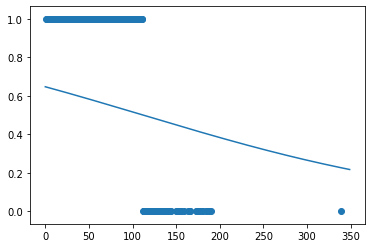

In [12]:
pred1 = [x[1] for x in clf.predict_proba(x_test)]
plt.scatter(x_test['dist'], y_pred)
plt.plot(range(350),yline.reshape(-1,1))
plt.show()

### Interpreting logistic regression coefficients: Use the “rule-of-4” discussed in class on Thursday,to interpret the solution:  what can you say about the change in the probability of switching wells, for every additional 100 meters of distance?

In [35]:
print('Given the model output, we can say for every additional 100 meters of distance, the probability of switch wells would like to decrease '+ str(-coef[0][0]*100/4)+'%') 

Given the model output, we can say for every additional 100 meters of distance, the probability of switch wells would like to decrease 0.16053968746530975%


In [37]:
y = data['switch']
X2 = np.array(data[['dist','arsenic']])
    
x_train, x_test, y_train, y_test = train_test_split(X2,y,test_size = 0.3)
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [38]:
y_pred = clf.predict(x_test)
print('The coefficients for the logistic regression are the following \n'+'beta0 = '+ str(clf.intercept_[0]) +'\n'+'beta1 = '+str(clf.coef_[0][0])+'\n'+'beta2 = '+str(clf.coef_[0][1]))

The coefficients for the logistic regression are the following 
beta0 = 0.09841442708075793
beta1 = -0.010818578676704315
beta2 = 0.45807497999943525


### Next we want to answer the question of which factor is more significant, distance, or arseniclevels?   This  is  not  a  well  specified  question,  since  these  two  features  have  different  units.One natural choice is to ask if after normalizing by the respective standard deviations of each feature, if moving one unit in one (normalized) feature predicts a larger change in probability of  switching  wells,  than  moving  one  unit  in  the  other  (also  normalized)  feature.  Use this reasoning to answer the question.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X2 = np.array(data[['dist','arsenic']])
sc = StandardScaler()
sc.fit(X2)
X_std = sc.transform(X2)

In [46]:
X_std

array([[-0.81892321,  0.63499567],
       [-0.02624912, -0.85524506],
       [-0.71128737,  0.37307458],
       ...,
       [-1.05592488, -1.0358803 ],
       [-0.66255101, -0.9184674 ],
       [-0.71448445, -0.90040387]])

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X_std,y,test_size = 0.3)
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

C:\Users\Green\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
y_pred = clf.predict(x_test)
print('The coefficients for the logistic regression are the following \n'+'beta0 = '+ str(clf.intercept_[0]) +'\n'+'beta1 = '+str(clf.coef_[0][0])+'\n'+'beta2 = '+str(clf.coef_[0][1]))

The coefficients for the logistic regression are the following 
beta0 = 0.317602669955289
beta1 = -0.3326985417955415
beta2 = 0.5051191865239906


### Since the absolute value of beta2 is larger than beta1, arsenic is more significant affecting the probability of switching wells. Each additional unit increase in normalized arsenic is assoicated with 12.5% increase in the probability of switching wells compared to 8% decrease in the probability of switching wells. 

### Now consider all the features in the data set.  Also consider adding interaction terms among all features that have a large main effect.  Use cross validation to build the best model you can (using your training set only), and then report the test error of your best model.

In [118]:
final = data[['assoc','educ']]
sc = StandardScaler()
sc.fit(data.iloc[:,[1,2]])
X_std = sc.transform(data.iloc[:,[1,2]])
X_std
new = pd.DataFrame(X_std, columns=['arsenic','dist'], index=range(1,3021))
final[['arsenic','dist']] = new
final

C:\Users\Green\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,assoc,educ,arsenic,dist
1,0,0,0.634996,-0.818923
2,0,0,-0.855245,-0.026249
3,0,10,0.373075,-0.711287
4,0,12,-0.457848,-0.697797
5,1,14,-0.503006,-0.193850
...,...,...,...,...
3016,1,5,-1.026849,-0.753396
3017,1,3,-0.521070,-0.700396
3018,0,4,-1.035880,-1.055925
3019,0,3,-0.918467,-0.662551


In [139]:
from sklearn.linear_model import LogisticRegressionCV
x_train, x_test, y_train, y_test = train_test_split(final,y,test_size = 0.3)
clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.coef_)

0.6296121097445601
[[-0.03818195  0.02121744  0.2153419  -0.14814196]]


### From the coefficient output, we can say features that have a large main effect are arsenic and dist (after normalized).

In [120]:
df1 = final.copy()
df1['dist*arsenic'] = data['dist']*data['arsenic']
df1['dist*assoc'] = data['dist']*data['assoc']
df1['arsenic*assoc'] = data['arsenic']*data['assoc']

In [134]:
X4 = df1[['arsenic','dist','assoc','educ','dist*arsenic']]
x_train, x_test, y_train, y_test = train_test_split(X4,y,test_size = 0.3)
clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(x_train, y_train)
print(mean_squared_error(y_train,clf.predict(x_train)))

0.3869441816461684


In [135]:
X5 = df1[['arsenic','dist','assoc','educ','dist*assoc']]
x_train, x_test, y_train, y_test = train_test_split(X5,y,test_size = 0.3)
clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(x_train, y_train)
print(mean_squared_error(y_train,clf.predict(x_train)))

0.37653736991485337


In [136]:
X6 = df1[['arsenic','dist','assoc','educ','arsenic*assoc']]
x_train, x_test, y_train, y_test = train_test_split(X6,y,test_size = 0.3)
clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(x_train, y_train)
print(mean_squared_error(y_train,clf.predict(x_train)))

0.3637653736991485


In [137]:
X7 = df1[['arsenic','dist','assoc','educ','arsenic*assoc','dist*arsenic','dist*assoc']]
x_train, x_test, y_train, y_test = train_test_split(X7,y,test_size = 0.3)
clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(x_train, y_train)
print(mean_squared_error(y_train,clf.predict(x_train)))

0.37748344370860926
